In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
from keras.utils import to_categorical

In [2]:
# loading MNIST dataset
(X_train, _), (X_test, _) = mnist.load_data()

In [3]:
# normalizing the data
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [4]:
# reshaping the data
x_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
x_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [5]:
# Autoencoder architecture
input_img = Input(shape=(784,))

# encoders
encoded = Dense(256, activation='relu')(input_img)
encoded = Dense(128, activation='relu')(encoded)
# feature representation
encoded = Dense(64, activation='relu')(encoded)
# decoders
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 dense_5 (Dense)             (None, 784)               201488

In [6]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [7]:
history = autoencoder.fit(x_train, x_train,
 epochs=20,
 batch_size=256,
 shuffle=True,
 validation_data=(x_test, x_test))

Epoch 1/20
235/235 [==============================] - 8s 22ms/step - loss: 0.2188 - val_loss: 0.1390
Epoch 2/20
235/235 [==============================] - 5s 20ms/step - loss: 0.1251 - val_loss: 0.1125
Epoch 3/20
235/235 [==============================] - 5s 20ms/step - loss: 0.1093 - val_loss: 0.1044
Epoch 4/20
235/235 [==============================] - 5s 19ms/step - loss: 0.1021 - val_loss: 0.0984
Epoch 5/20
235/235 [==============================] - 6s 25ms/step - loss: 0.0975 - val_loss: 0.0947
Epoch 6/20
235/235 [==============================] - 5s 21ms/step - loss: 0.0938 - val_loss: 0.0914
Epoch 7/20
235/235 [==============================] - 5s 20ms/step - loss: 0.0913 - val_loss: 0.0893
Epoch 8/20
235/235 [==============================] - 4s 18ms/step - loss: 0.0892 - val_loss: 0.0877
Epoch 9/20
235/235 [==============================] - 5s 20ms/step - loss: 0.0875 - val_loss: 0.0861
Epoch 10/20
235/235 [==============================] - 5s 20ms/step - loss: 0.0861 - val_lo

dict_keys(['loss', 'val_loss'])


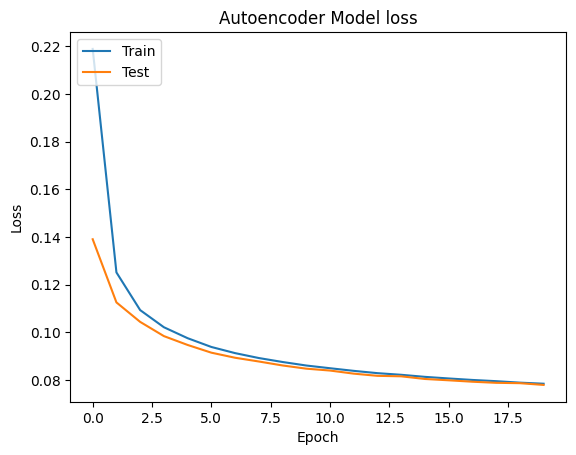

In [8]:
# diagnostic plot
def plotmodelhistory(history): 
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Autoencoder Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())
# visualization of the loss minimization during the training process
plotmodelhistory(history)

In [9]:
# reconstruction error
decoded_imgs = autoencoder.predict(x_test)
# get output of feature representation layer
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [10]:
# save Autoencoder and encoder model
autoencoder.save('autoencoder_model.keras')
encoder.save('encoder_model.keras')

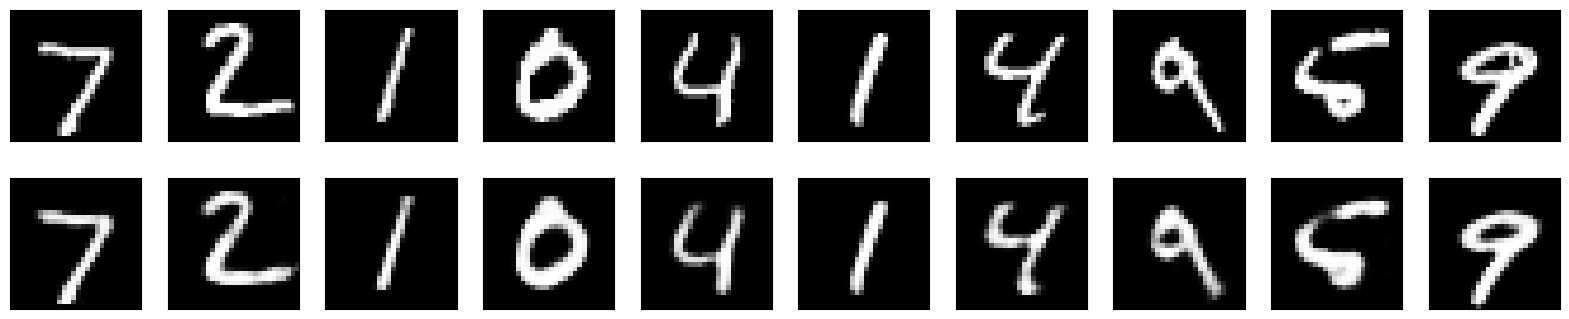

In [11]:
# plot the reconstructed images
n=10
plt.figure(figsize=(20, 4))
for i in range(n):
 # display original
 ax = plt.subplot(2, n, i + 1)
 plt.imshow(x_test[i].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)# display reconstruction
 ax = plt.subplot(2, n, i + 1 + n)
 plt.imshow(decoded_imgs[i].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
plt.show()